# Método de Clustering Hierárquico

#### Este método de agrupamento de dados consiste em unir pares de dados usando uma distância de linkagem. A análise gráfica foi realisada pela plotagem de um dendrograma. Um dendrograma é uma estrutura em formato de árvore, que explica a relação entre cada ponto de dado de um Dataset

In [1]:
#Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.cluster.hierarchy import dendrogram

#criando o DataFrame "df_chem"
df = pd.read_csv("Minerals_Database3.csv")  # Importação do dataset para ser utilizado como dataframe
# Remoção de colunas não necessárias para o dataframe

df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)

dados_cat = df.reindex(df.columns[[0,2,4]], axis = 1) # Remoção de dados categóricos
dados_categoricos = dados_cat.astype("category") # Tratamento de dados para o tipo categórico
newlist = [x for x in range(7,135)] # Range para pegarmos dados que estão em porcentagem
porcent_df = df.reindex(df.columns[newlist], axis = 1) # Coleta dos dados de elementos em porcentagem
df_chem = df.reindex(df.columns[[1,3,5,135,136,137,137]], axis=1) # Reindexação de um dataframe contendo apenas propriedades fisico-químicas
df_chem
df_chem, dados_categoricos

df_remove=df_chem.loc[(df["Refractive Index"] == 0.000)]

df_chem = df_chem.drop(df_remove.index)
print(df_chem)

     Mohs Hardness  Specific Gravity  Refractive Index  Molar Mass  \
0             4.50             3.240             1.580  817.339002   
1             2.75             3.446             1.592  435.069330   
2             2.00             4.420             2.085  921.092220   
4             5.50             1.050             1.634  861.185368   
5             3.50             3.295             1.457  225.618151   
..             ...               ...               ...         ...   
803           7.50             4.650             1.928  526.041800   
805           6.50             3.230             1.702  379.378178   
806           3.50             2.180             1.590  492.887716   
807           7.00             3.411             1.596  263.580584   
808           0.00             3.146             1.633  576.801907   

     Molar Volume  Calculated Density  Calculated Density  
0        0.123390               5.498               5.498  
1        0.056083               6.439  

#### Reindexação do Dataframe, e definição de atributos e alvo

In [2]:
nome = 'df_chem'
atributos = ["Specific Gravity", "Mohs Hardness", 'Molar Mass', 'Molar Volume', 'Calculated Density']
target = ["Refractive Index"]
#df_chem_r2 = df_chem.reindex(atributos, axis=1)

#### Escalonamento padrão do Dataframe

In [3]:
sc = StandardScaler() #Função que escalona
sc.fit(df_chem)     #Fit dos dados escalonados
df_chem_norma = sc.transform(df_chem)

In [11]:
print(df_chem_norma)

[[ 0.31604369  0.11090477 -0.55014037 ...  0.23546097  0.26051248
   0.26051248]
 [-0.57569712  0.24368401 -0.50042672 ... -0.42196401  0.60854766
   0.60854766]
 [-0.95787176  0.87148485  1.54197547 ...  0.22805018  0.53272704
   0.53272704]
 ...
 [-0.19352249 -0.57232818 -0.50871233 ... -0.20236363  0.15288418
   0.15288418]
 [ 1.58995914  0.22112443 -0.48385551 ... -0.09597107 -0.86829024
  -0.86829024]
 [-1.97700411  0.05031619 -0.33057178 ... -0.20198016  0.47983752
   0.47983752]]


#### Definição do método Hierárquico e seus atributos

In [4]:
hierarquico = AgglomerativeClustering(
    n_clusters = None,       #Numero de clusters
    affinity = 'euclidean',  #Métrica que computa as distâncias
    #memory = None,
    connectivity = None,     #Define uma matriz de conectividade, no caso de querermos uma hierarquia estruturada
    compute_full_tree = 'auto',  #Computa toda a árvore hierarquica, ou se em auto, para de computar após atingir o numero de clusters definido
    linkage = 'ward',            #Critério de linkagem, que irá definir quais distancias usar entre cada ramificação
    distance_threshold = 0,      #Distancia de linkagem até onde os clusters não serão unidos
    compute_distances = False    #Computa as distâncias em um grafico de dendrograma
)

yhierarquico = hierarquico.fit_predict(df_chem_norma)
print(yhierarquico)

[385 496 403 459 417 408 363 586 469 423 457 527 413 541 536 393 568 303
 341 419 556 543 462 495 353 516 427 429 491 362 371 338 540 437 533 394
 587 361 388 542 500 460 302 307 407 360 479 404 356 405 430 412 559 318
 539 552 521 350 399 522 422 364 557 466 431 574 553 476 269 494 509 294
 531 375 435 544 315 439 367 316 428 525 387 382 576 201 425 357 519 293
 530 319 445 564 349 534 395 580 271 440 344 567 247 529 443 146 505 515
 411 441 551 518 320 480 373 369 426 461 442 213 159 299 379 486 558 571
 390 296 563 575 317 239 554 398 348 276 275 327 310 446 433 465 415 546
 478 569 499 452 549 323 270 503 526 475 400 389 517 337 174 397 485 134
 336 450 507 359 370 547 354 561 355 528 333 406 311 278 470 184 335 550
 572 432 242 579 560 198 279 498 538 177 396 322 237 304 410 220 266 263
 368 260 562 455 374 380 365 535 418 583 328 366 570 158 284 473 151 332
 449 472 208 313 347 183 471 416 420 456 280 573 309 492 504 258 401 484
 585 189 330 343 454 514 281 510 555 501 222 277 42

#### Graficando os grupos formados por Dendrograma

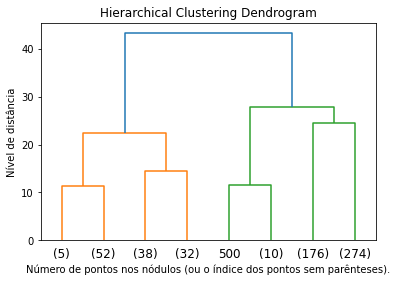

In [14]:
def plot_dendrogram(model, **kwargs):
    """Cria uma matriz de linkagem e plota o dendrograma"""

    # Define a numeração da quantidade de nódulos de cada amostra
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Nódulo das folhas
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plota o dendrograma correspondente
    dendrogram(linkage_matrix, **kwargs)


hierarquico_1 = hierarquico.fit(df_chem_norma)
plt.title("Hierarchical Clustering Dendrogram")
# Plota os 4 primeiros Componentes Principais
plot_dendrogram(hierarquico_1, truncate_mode="level", p=2)
plt.xlabel("Número de pontos nos nódulos (ou o índice dos pontos sem parênteses).")
plt.ylabel("Nível de distância")
plt.show()

### Análise de Componentes Principais do DataFrame (PCA)

In [10]:
pca = PCA()
pca.fit(df_chem_norma)  #Fita o Dataframe
df_chem_pca = pca.transform(df_chem_norma)  #Transforma o Dataframe fitado em um que contenha suas componentes principais
print(df_chem_pca)

[[ 7.00923272e-02  7.16037385e-01  1.40586738e-01 ... -4.82165856e-01
  -2.31554278e-01  1.36002321e-15]
 [ 6.39034248e-01 -1.34451079e-02 -9.41143236e-01 ... -4.48799374e-01
  -4.58124852e-02  8.88178420e-16]
 [ 1.41212458e+00  1.14738403e+00 -1.49301953e-01 ...  4.77363102e-01
  -3.28047717e-01  0.00000000e+00]
 ...
 [-2.28358354e-01  1.50200167e-02 -5.59259096e-01 ...  9.13104797e-02
  -9.12327230e-02 -2.08166817e-16]
 [-8.95984541e-01 -9.68071921e-01  1.50407665e+00 ... -5.82257441e-01
  -6.42893352e-02  1.11022302e-15]
 [ 3.20021994e-01  5.25102361e-01 -1.95862333e+00 ... -1.38267962e-01
  -1.84295916e-01  6.10622664e-16]]


In [7]:
hierarquico_pca = AgglomerativeClustering(
    n_clusters = None,       #Numero de clusters
    affinity = 'euclidean',  #Métrica que computa as distâncias
    #memory = None,
    connectivity = None,     #Define uma matriz de conectividade, no caso de querermos uma hierarquia estruturada
    compute_full_tree = 'auto',  #Computa toda a árvore hierarquica, ou se em auto, para de computar após atingir o numero de clusters definido
    linkage = 'ward',            #Critério de linkagem, que irá definir quais distancias usar entre cada ramificação
    distance_threshold = 0,      #Distancia de linkagem até onde os clusters não serão unidos
    compute_distances = False    #Computa as distâncias em um grafico de dendrograma
)

yhierarquico2 = hierarquico_pca.fit_predict(df_chem_pca)
print(yhierarquico2)

[385 496 403 459 417 408 363 586 469 423 457 527 413 541 536 393 568 303
 341 419 556 543 462 495 353 516 427 429 491 362 371 338 540 437 533 394
 587 361 388 542 500 460 302 307 407 360 479 404 356 405 430 412 559 318
 539 552 521 350 399 522 422 364 557 466 431 574 553 476 269 494 509 294
 531 375 435 544 315 439 367 316 428 525 387 382 576 201 425 357 519 293
 530 319 445 564 349 534 395 580 271 440 344 567 247 529 443 146 505 515
 411 441 551 518 320 480 373 369 426 461 442 213 159 299 379 486 558 571
 390 296 563 575 317 239 554 398 348 276 275 327 310 446 433 465 415 546
 478 569 499 452 549 323 270 503 526 475 400 389 517 337 174 397 485 134
 336 450 507 359 370 547 354 561 355 528 333 406 311 278 470 184 335 550
 572 432 242 579 560 198 279 498 538 177 396 322 237 304 410 220 266 263
 368 260 562 455 374 380 365 535 418 583 328 366 570 158 284 473 151 332
 449 472 208 313 347 183 471 416 420 456 280 573 309 492 504 258 401 484
 585 189 330 343 454 514 281 510 555 501 222 277 42

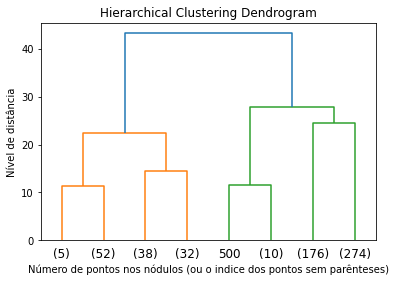

In [13]:
hierarquico_2 = hierarquico_pca.fit(df_chem_pca)
plt.title("Hierarchical Clustering Dendrogram")
# Plota os 4 primeiros Componentes Principais
plot_dendrogram(hierarquico_2, truncate_mode="level", p=2)
plt.xlabel("Número de pontos nos nódulos (ou o indice dos pontos sem parênteses)")
plt.ylabel("Nível de distância")
plt.show()

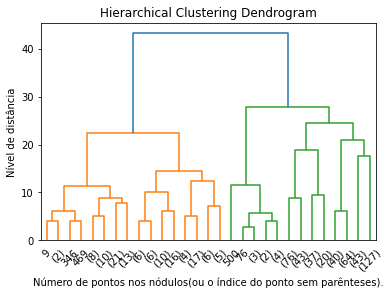

In [12]:
hierarquico_2 = hierarquico_pca.fit(df_chem_pca)
plt.title("Hierarchical Clustering Dendrogram")
# Plota os 4 primeiros Componentes Principais
plot_dendrogram(hierarquico_2, truncate_mode="level", p=4)
plt.xlabel("Número de pontos nos nódulos(ou o índice do ponto sem parênteses).")
plt.ylabel("Nível de distância")
plt.show()

Nota-se que o gráfico dendrograma já nos dá as componentes principais do Dataframe, pois é o mesmo que com os dados sem terem sido fitados na função PCA.
Vemos que grande parte dos dados está mais a 